In [62]:
# 다항 회귀 (polynomialFeatures)
# : 데이터 분포 형태가 곡선을 띠고 있으므로, 선형회귀로는 예측이 불가함

In [63]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [64]:
# numpy의 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [65]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [66]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

다항 회귀

In [67]:
# 특성, 제곱을 자동으로 만들어주는 라이브러리
# 우선 수동으로 해보고, 마지막에 이걸 쓰기로
from sklearn.preprocessing import PolynomialFeatures

In [68]:
df = pd.DataFrame([perch_length,perch_weight],index=['length','weight'])
df = df.T
df.head(5)

df['제곱'] = df['length']**2

In [69]:
df.head(3)

,length,weight,제곱
0,8.4,5.9,70.56
1,13.7,32.0,187.69
2,15.0,40.0,225.00


In [70]:
# 직접 특성을 추가
# 데이터 전처리 : train, test 세트 구성
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [71]:
train_poly.shape

(42, 2)

In [72]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [73]:
# 농어 50cm 예측
# knr - 1033g, lr-선형회귀 : 1241g, lr-다항회귀 : 1573g
predict = lr.predict([[50**2, 50]])
predict

array([1573.98423528])

In [76]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


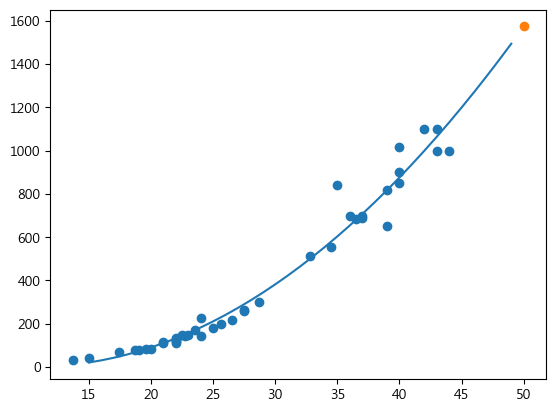

In [77]:
# 그래프 출력
# 선형회귀 - 15,50의 값을 넣어서 선을 그리기
plt.scatter(train_input, train_target)
x = np.arange(15,50)
plt.plot(x, 1.014*(x**2) + (-21.558)*x + 116.050)  # 기울기 * x**2 + 기울기 * x + y절편
plt.scatter(50,1574)

In [78]:
# 예측률
print("train 예측률", lr.score(train_poly, train_target))
print("test 예측률", lr.score(test_poly, test_target))

train 예측률 0.9706807451768623
test 예측률 0.9775935108325122
